In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

2023-10-22 00:51:11.680899: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 00:51:11.970068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 00:51:11.970111: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 00:51:11.972299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 00:51:12.128093: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 00:51:12.130151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [76]:
DATASET = 'LTE_Network_Traffic'
SEED = 42
N = 150
SEQ = 6

In [77]:
tf.random.set_seed(SEED)
np.random.seed(SEED)
plt.rcParams['figure.figsize'] = [10, 8]

In [78]:
def load_data(seq_len, n):
    csv = f'out/{DATASET}/data/ts_real_fake.csv'

    data = pd.read_csv(csv)

    real = data.real
    real = real.to_numpy()[:n * seq_len]
    real = np.reshape(real, (-1, seq_len))
    real = MinMaxScaler().fit_transform(real)

    fake = data.fake
    fake = fake.to_numpy()[:n * seq_len]
    fake = np.reshape(fake, (-1, seq_len))
    fake = MinMaxScaler().fit_transform(fake)

    return real, fake

In [79]:
def fig_path(fig_name): return f'out/{DATASET}/figures/DBSCAN_{fig_name}'

In [80]:
real, fake = load_data(SEQ, N)
rand = np.random.rand(N, SEQ)

Estimated number of clusters: 1
Estimated number of noise points: 143


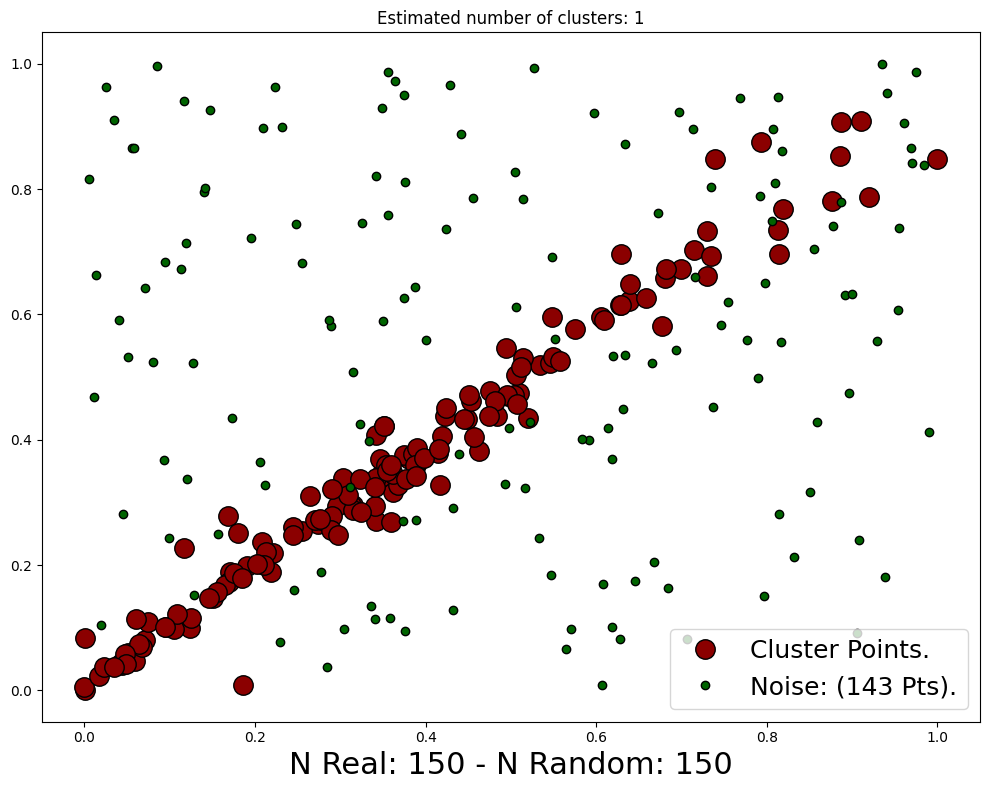

In [81]:
dataX = np.vstack((real, rand))
np.random.shuffle(dataX)

db = DBSCAN(eps=0.3, min_samples=6).fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataX[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor='darkred',
        markeredgecolor="k",
        markersize=14,
    )

    xy = dataX[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor='darkgreen',
        markeredgecolor="k",
        markersize=6,
    )
    
plt.legend(fontsize=18, labels=['Cluster Points.', f'Noise: ({n_noise_} Pts).'])
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel(f'N Real: {len(real)} - N Random: {len(rand)}', fontdict={"size": 22})
plt.tight_layout()
plt.savefig(fig_path('real_random'))

Estimated number of clusters: 1
Estimated number of noise points: 0


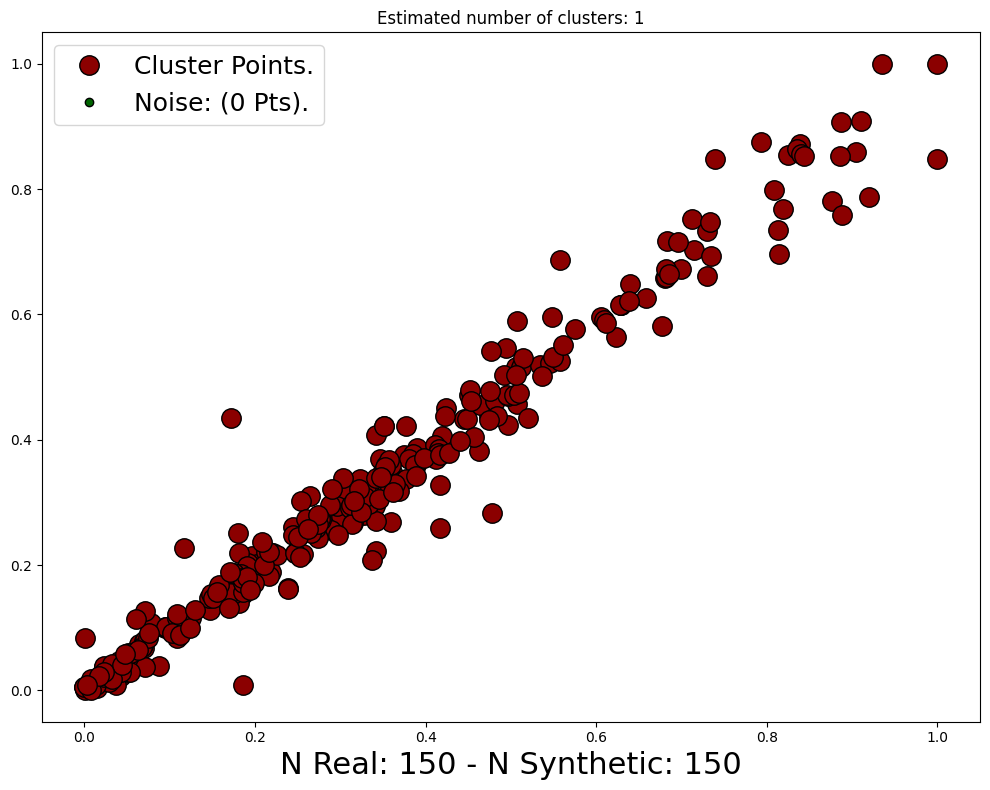

In [82]:
dataX = np.vstack((real, fake))
np.random.shuffle(dataX)

db = DBSCAN(eps=0.3, min_samples=6).fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataX[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor='darkred',
        markeredgecolor="k",
        markersize=14,
    )
    
    xy = dataX[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor='darkgreen',
        markeredgecolor="k",
        markersize=6,
    )
    
plt.legend(fontsize=18, labels=['Cluster Points.', f'Noise: ({n_noise_} Pts).'])    
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel(f'N Real: {len(real)} - N Synthetic: {len(fake)}', fontdict={"size": 22})
plt.tight_layout()
plt.savefig(fig_path('real_fake'))

In [75]:
len(fake)

150